In [ ]:
import os

In [ ]:
os.getcwd()

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
#execute for once
#os.mkdir("Major_Project_21")

In [ ]:
%cd Major_Project_21/

/content/drive/My Drive/Colab Notebooks/Major_Project_21


Downloading Data from Kaggle

In [ ]:
! pip install kaggle

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/Major_Project_21

/content/drive/My Drive/Colab Notebooks/Major_Project_21


In [ ]:
#os.mkdir(".kaggle/")

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot create regular file '/root/.kaggle/': Not a directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download tawsifurrahman/tuberculosis-tb-chest-xray-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
ls -a

 CNN.npy    kaggle.json    tuberculosis-tb-chest-xray-dataset.zip
 .kaggle/  'Test image'/


In [ ]:
import zipfile
file=zipfile.ZipFile('tuberculosis-tb-chest-xray-dataset.zip')
file.extractall()

In [ ]:
ls

 CNN.npy                         'Test image'/
 kaggle.json                      tuberculosis-tb-chest-xray-dataset.zip
 TB_Chest_Radiography_Database/


In [ ]:
!pwd

/content/drive/My Drive/Colab Notebooks/Major_Project_21


In [ ]:
ls


 CNN.npy                         'Test image'/
 kaggle.json                      tuberculosis-tb-chest-xray-dataset.zip
 TB_Chest_Radiography_Database/


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/Major_Project_21/TB_Chest_Radiography_Database

/content/drive/My Drive/Colab Notebooks/Major_Project_21/TB_Chest_Radiography_Database


In [ ]:
ls

Normal/               README.md.txt  Tuberculosis.metadata.xlsx
Normal.metadata.xlsx  Tuberculosis/


Plotting some images of dataset using matplot library

In [ ]:
base_path=os.getcwd()


In [ ]:
base_path

'/content/drive/My Drive/Colab Notebooks/Major_Project_21/TB_Chest_Radiography_Database'

In [ ]:
clas='/Tuberculosis/'
image_path=os.listdir('Tuberculosis')

In [ ]:
len(image_path)

235

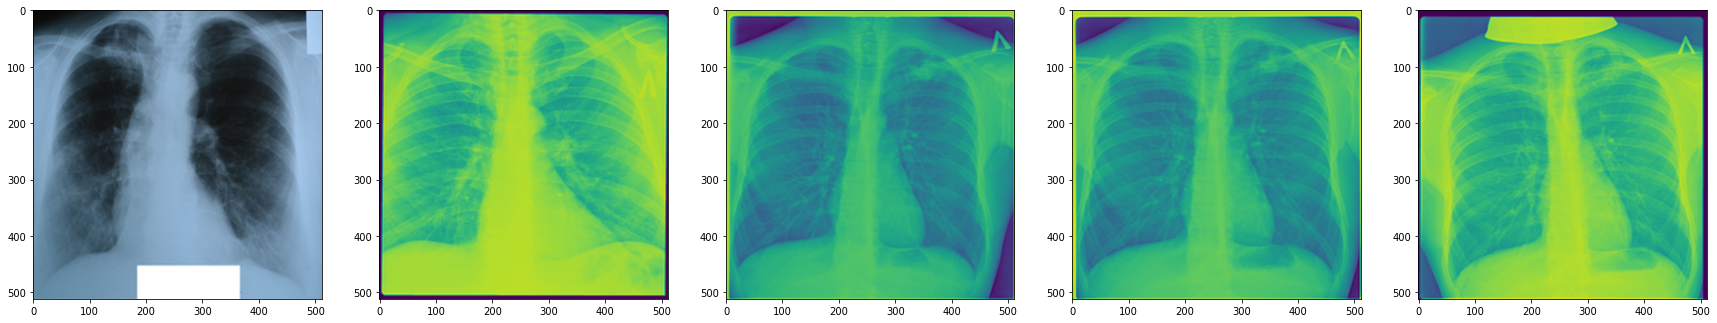

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


fig,axes=plt.subplots(1,5,figsize=(30,10))
for i in range(0,5):
  path=base_path+clas+image_path[i]
  image=mpimg.imread(path,0)
  axes[i].imshow(image)

In [ ]:
clas2='/Normal/'
im_path2=os.listdir('Normal')

In [ ]:
len(im_path2)

1356

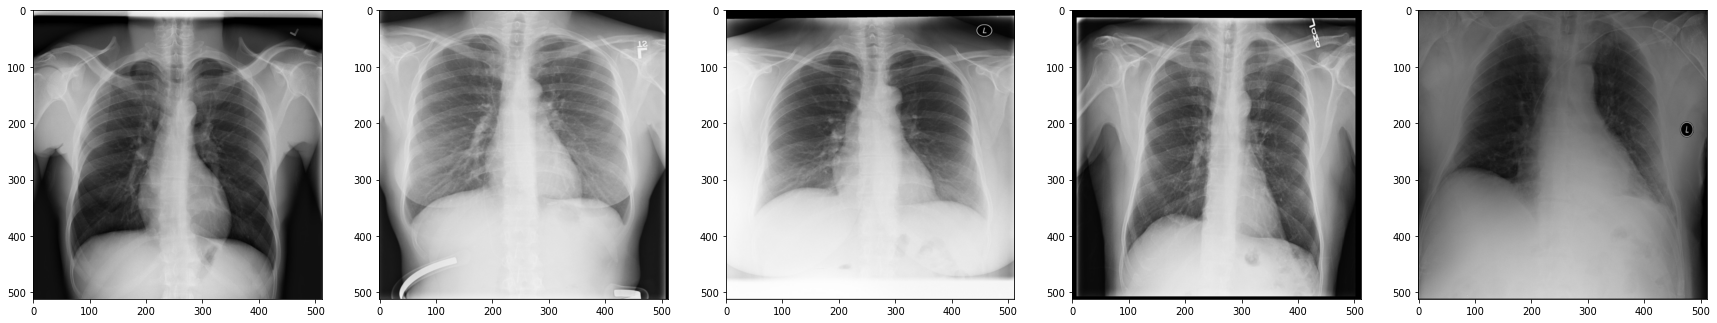

In [ ]:
fig,axes=plt.subplots(1,5,figsize=(30,10))
k=0
for i in range(10,15):
  path=base_path+clas2+im_path2[i]
  image=mpimg.imread(path,0)
  axes[k].imshow(image)
  k+=1

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

In [ ]:
pwd

'/content/drive/My Drive/Colab Notebooks/Major_Project_21/TB_Chest_Radiography_Database'

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/Major_Project_21

/content/drive/My Drive/Colab Notebooks/Major_Project_21


In [ ]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
TRAINING_DIR='TB_Chest_Radiography_Database/'
training_datagen=ImageDataGenerator(
    featurewise_center=True, samplewise_center=True,
    featurewise_std_normalization=True, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=30, width_shift_range=0.2,
    height_shift_range=0.2, brightness_range=None, shear_range=0.4, zoom_range=0.4, fill_mode='nearest',
    horizontal_flip=True, vertical_flip=True, rescale=1./255, validation_split=0.2
)


train_generator=training_datagen.flow_from_directory(TRAINING_DIR,
                                                     target_size=(128,128),
                                                     shuffle=True,
                                                     batch_size=128,
                                                     class_mode='categorical',
                                                     subset='training')


validation_generator=training_datagen.flow_from_directory(TRAINING_DIR,
                                                          target_size=(128,128),
                                                          class_mode='categorical',
                                                          subset='validation')

**CNN Model**

In [ ]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(128,128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 256)      0

In [ ]:
my_model=model.fit_generator(train_generator,epochs=20,validation_data=validation_generator,verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
27/27 [==============================] - 70s 3s/step - loss: 0.1924 - accuracy: 0.9327 - recall: 0.9327 - precision: 0.9327 - val_loss: 0.2518 - val_accuracy: 0.8821 - val_recall: 0.8821 - val_precision: 0.8821
Epoch 2/20
27/27 [==============================] - 66s 2s/step - loss: 0.1907 - accuracy: 0.9366 - recall: 0.9366 - precision: 0.9366 - val_loss: 0.1980 - val_accuracy: 0.9274 - val_recall: 0.9274 - val_precision: 0.9274
Epoch 3/20
27/27 [==============================] - 66s 2s/step - loss: 0.1791 - accuracy: 0.9360 - recall: 0.9360 - precision: 0.9360 - val_loss: 0.2303 - val_accuracy: 0.9143 - val_recall: 0.9143 - val_precision: 0.9143
Epoch 4/20
27/27 [==============================] - 65s 2s/step - loss: 0.1966 - accuracy: 0.9336 - recall: 0.9336 - precision: 0.9336 - val_loss: 0.1928 - val_accuracy: 0.9214 - val_recall: 0.9214 - val_precision: 0.9214
Epoch 5/20
27/27 [==============================] - 64s 2s/step - loss: 0.2070 - accuracy: 0.9321 - recall: 0.93

In [ ]:
model.save('CNN.h5')

In [ ]:
ls

 CNN.h5                          'Test image'/
 kaggle.json                      tuberculosis-tb-chest-xray-dataset.zip
 TB_Chest_Radiography_Database/


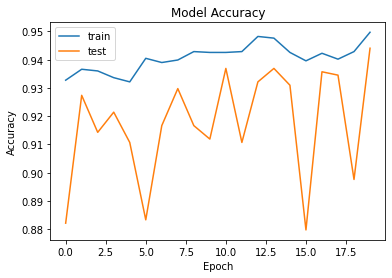

In [ ]:
plt.plot(my_model.history['accuracy'])
plt.plot(my_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

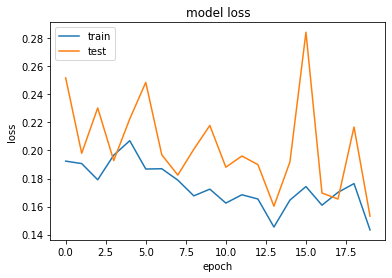

In [ ]:
plt.plot(my_model.history['loss'])
plt.plot(my_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
import numpy as np
np.save('CNN.npy',my_model.history)

MobileNet model(optional)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd


In [ ]:
cd /content/drive/My Drive/Colab Notebooks

In [ ]:
cd /content/drive/My Drive/Colab Notebooks/Major_Project_21

In [ ]:
ls

In [ ]:
TRAINING_DIR='TB_Chest_Radiography_Database/'
training_datagen=ImageDataGenerator(
    featurewise_center=True, samplewise_center=True,
    featurewise_std_normalization=True, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=30, width_shift_range=0.2,
    height_shift_range=0.2, brightness_range=None, shear_range=0.4, zoom_range=0.4, fill_mode='nearest',
    horizontal_flip=True, vertical_flip=True, rescale=1./255, validation_split=0.2
)
train_generator=training_datagen.flow_from_directory(TRAINING_DIR,
                                                     target_size=(128,128),
                                                     shuffle=True,
                                                     batch_size=128,
                                                     class_mode='categorical',
                                                     subset='training')
validation_generator=training_datagen.flow_from_directory(TRAINING_DIR,
                                                          target_size=(128,128),
                                                          class_mode='categorical',
                                                          subset='validation')

In [ ]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121,ResNet101,VGG19,InceptionV3,MobileNetV2
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

In [ ]:
model_d=MobileNetV2(weights='imagenet',include_top=False, input_shape=(128,128,3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(2,activation='softmax')(x) #FC-layer

In [ ]:
model=Model(inputs=model_d.input,outputs=preds)
model.summary()

In [ ]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [ ]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('MobileNet.h5', verbose=1, save_best_only=True)




# Fits-the-model
history = model.fit_generator(train_generator,
               epochs=20,
               verbose=2,
               callbacks=[anne, checkpoint],
               validation_data=validation_generator)

**Prediction of proposed model**

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/Major_Project_21/

/content/drive/My Drive/Colab Notebooks/Major_Project_21


In [ ]:
ls

 CNN.h5                         TB_Chest_Radiography_Database/
 CNN.npy                       'Test image'/
'Copy of Minor_Project.ipynb'   tuberculosis-tb-chest-xray-dataset.zip
 kaggle.json


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from keras.models import load_model
import numpy as np


model = load_model('CNN.h5')

model.compile(loss='categorical_crossentropy',

              optimizer='Adam',metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
from keras.preprocessing import image

In [ ]:
import os
os.chdir('TB_Chest_Radiography_Database')

In [ ]:
class_0=os.listdir('Normal')

In [ ]:
class_1=os.listdir('Tuberculosis')

In [ ]:
base=os.getcwd()

In [ ]:
clas='/Normal/'

In [ ]:
clas1='/Tuberculosis/'

In [ ]:
res_lis1=[]
for i in class_1:
  path=base+clas1+i
  test_image = keras.preprocessing.image.load_img(path, target_size = (128,128)) 
  test_image = keras.preprocessing.image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)

  result = model.predict(test_image)
  result=np.argmax(result)
  res_lis1.append(result)

In [ ]:
res_lis=[]
for i in class_0:
  path=base+clas+i
  test_image = keras.preprocessing.image.load_img(path, target_size = (128,128)) 
  test_image = keras.preprocessing.image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)

  result = model.predict(test_image)
  result=np.argmax(result)
  res_lis.append(result)


In [ ]:
TN=0
FP=0
for i in res_lis:
  if i==0:
    TN+=1
  else:
    FP+=1


In [ ]:
TP=0
FN=0
for i in res_lis1:
  if i==1:
    TP+=1
  else:
    FN+=1

In [ ]:
TN

941

In [ ]:
FP

78

In [ ]:
TP

201

In [ ]:
FN

34

**Performance analysis and prediction**

In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/Major_Project_21'

/content/drive/My Drive/Colab Notebooks/Major_Project_21


In [ ]:
import plotly.graph_objects as go

In [ ]:
y_tr=[ 0.9497]
y_tst=[0.9185]
x= ['CNN']
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y_tr,name='Train'))
fig.add_trace(go.Bar(x=x, y=y_tst,name='Validation'))
fig.update_layout(autosize=False,
    width=700,
    height=450,title='Performance of Different Models',xaxis_title="Models",
    yaxis_title="Accuracy",)
fig.update_yaxes(nticks=20)
fig.update_xaxes(nticks=40)
fig.update_traces(textposition='outside')
fig.update_yaxes(range=[0.3, 1])
fig.show()

In [ ]:
ls

 CNN.h5                         TB_Chest_Radiography_Database/
 CNN.npy                       'Test image'/
'Copy of Minor_Project.ipynb'   tuberculosis-tb-chest-xray-dataset.zip
 kaggle.json


In [ ]:
model_list='CNN.h5'

In [ ]:
model_list

'CNN.h5'

In [ ]:
base_path='/content/drive/My Drive/Colab Notebooks/Major_Project_21'

In [ ]:
cd /content/drive/My Drive/Colab Notebooks/Major_Project_21

/content/drive/My Drive/Colab Notebooks/Major_Project_21


In [ ]:
os.chdir('Test image')

In [ ]:
images=os.listdir()

In [ ]:
images

['Copy of Normal-3.png',
 'Copy of Tuberculosis-1.png',
 'Copy of Tuberculosis-102.png']

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from keras.models import load_model
import numpy as np

Prediction For Test Images

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pa=base_path+'/CNN.h5'

model = load_model(pa)

model.compile(loss='categorical_crossentropy',

              optimizer='Adam',metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
from keras.preprocessing import image

Class 1 = Tuberculosis ; Class 0 = Normal;

The Predicted Value For Each Class is ---> [[1. 0.]]
The Predicted Class is --> 0
So X-RAY is Normal


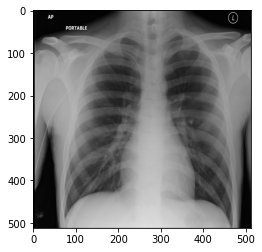

In [ ]:
path=images[0]
image_read=mpimg.imread(path,0)
plt.imshow(image_read)

#predict the result
decode={0:'Normal',1:'Tuberculosis'}

test_image = keras.preprocessing.image.load_img(path, target_size = (128,128)) 
test_image = keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)
print("The Predicted Value For Each Class is --->",result)
result=np.argmax(result)
print("The Predicted Class is -->",result)
print("So X-RAY is",decode[result])

The Predicted Value For Each Class is ---> [[0. 1.]]
The Predicted Class is --> 1
So X-RAY is Tuberculosis


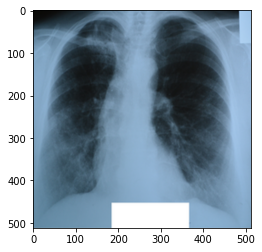

In [ ]:
path=images[1]
image_read=mpimg.imread(path,0)
plt.imshow(image_read)

#predict the result
decode={0:'Normal',1:'Tuberculosis'}

test_image = keras.preprocessing.image.load_img(path, target_size = (128,128)) 
test_image = keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)
print("The Predicted Value For Each Class is --->",result)
result=np.argmax(result)
print("The Predicted Class is -->",result)
print("So X-RAY is",decode[result])

The Predicted Value For Each Class is ---> [[0. 1.]]
The Predicted Class is --> 1
So X-RAY is Tuberculosis


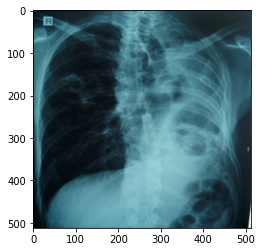

In [ ]:
path=images[2]
image_read=mpimg.imread(path,0)
plt.imshow(image_read)

#predict the result
decode={0:'Normal',1:'Tuberculosis'}

test_image = keras.preprocessing.image.load_img(path, target_size = (128,128)) 
test_image = keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)
print("The Predicted Value For Each Class is --->",result)
result=np.argmax(result)
print("The Predicted Class is -->",result)
print("So X-RAY is",decode[result])

Grad CAM Image

In [ ]:
from keras.models import load_model
pa=base_path+'/CNN.h5'

model = load_model(pa)


In [ ]:
model

In [ ]:
a=model.layers

In [ ]:
x=a[14]

In [ ]:
x.name

'dense_2'

In [ ]:
x.output.shape

TensorShape([None, 64])

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import Model

import tensorflow as tf

import numpy as np
import imutils
import cv2

In [ ]:
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName

        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output.shape) == 4:
                return layer.name

        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(inputs=[self.model.inputs], outputs= [self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]

        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads

        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))

        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")

        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.3,
        colormap=cv2.COLORMAP_JET):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

Generation Of GradCam Image for Tuberculosis and Normal Image

Example 1

In [ ]:
image = load_img(images[0], target_size=(128,128))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

Class 0 is --> Normal
The Predicted Value For Each Class is ---> [[1. 0.]]


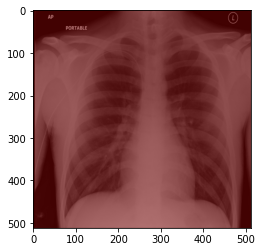

In [ ]:
preds = model.predict(image)
clas= np.argmax(preds)

print("Class", clas, "is -->" ,decode[clas])
print("The Predicted Value For Each Class is --->",preds)
cam = GradCAM(model, clas)
heatmap = cam.compute_heatmap(image)
orig = cv2.imread(images[0])
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)
plt.imshow(output)

Example 2

In [ ]:
image = load_img(images[1], target_size=(128,128))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

Class 1 is --> Tuberculosis
The Predicted Value For Each Class is ---> [[0. 1.]]


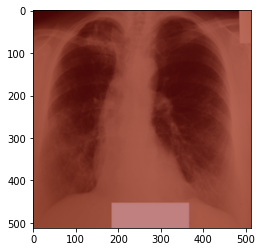

In [ ]:
preds = model.predict(image)
clas= np.argmax(preds)
print("Class", clas, "is -->" ,decode[clas])
print("The Predicted Value For Each Class is --->",preds)
cam = GradCAM(model, clas)
heatmap = cam.compute_heatmap(image)
orig = cv2.imread(images[1])
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)
plt.imshow(output)

Example 3

In [ ]:
image = load_img(images[2], target_size=(128,128))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

Class 1 is --> Tuberculosis
The Predicted Value For Each Class is ---> [[0. 1.]]


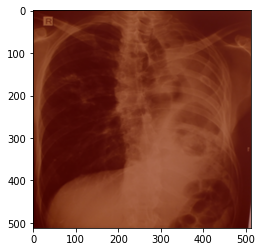

In [ ]:
preds = model.predict(image)
clas= np.argmax(preds)
print("Class", clas, "is -->" ,decode[clas])
print("The Predicted Value For Each Class is --->",preds)
cam = GradCAM(model, clas)
heatmap = cam.compute_heatmap(image)
orig = cv2.imread(images[2])
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)
plt.imshow(output)